In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2

In [3]:
import numpy as np
import requests
from io import BytesIO

In [4]:
def url_img(url):
    try:
        response=requests.get(url)
        if response.status_code==200:
            image_data=BytesIO(response.content)
            im_array=np.asarray(bytearray(image_data.read()),dtype=np.uint8)
            image=cv2.imdecode(im_array,cv2.IMREAD_COLOR)
            return image
        else:
            print("Failed to retrieve image from URL. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None
            

In [20]:
def image_seg(image):
    h,w,_=image.shape
    sub=[(0,0,int(w/2),int(h/2)),
         (int(w/2),0,w,int(h/2)),
         (0,int(h/2),int(w/2),h),
         (int(w/2),int(h/2),w,h),
         (0,0,int(w/2),h),
         (int(w/2),0,w,h),
        (0,0,w,int(h/2)),
        (0,int(h/2),w,h)]
    sub_imgs=[]
    for coords in sub:
        x1,y1,x2,y2=coords
        sub_img=image[y1:y2,x1:x2,:]
        sub_imgs.append(sub_img)
    return sub_imgs

In [19]:
h,w,_=image.shape
_

3

In [6]:
img_path='https://www.shutterstock.com/shutterstock/photos/465566966/display_1500/stock-vector-smiley-vector-happy-face-465566966.jpg'

In [7]:
image=url_img(img_path)

In [8]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]],

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]],

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]]

In [9]:
type(image)

numpy.ndarray

In [10]:
image.shape

(1600, 1500, 3)

(-0.5, 1499.5, 1599.5, -0.5)

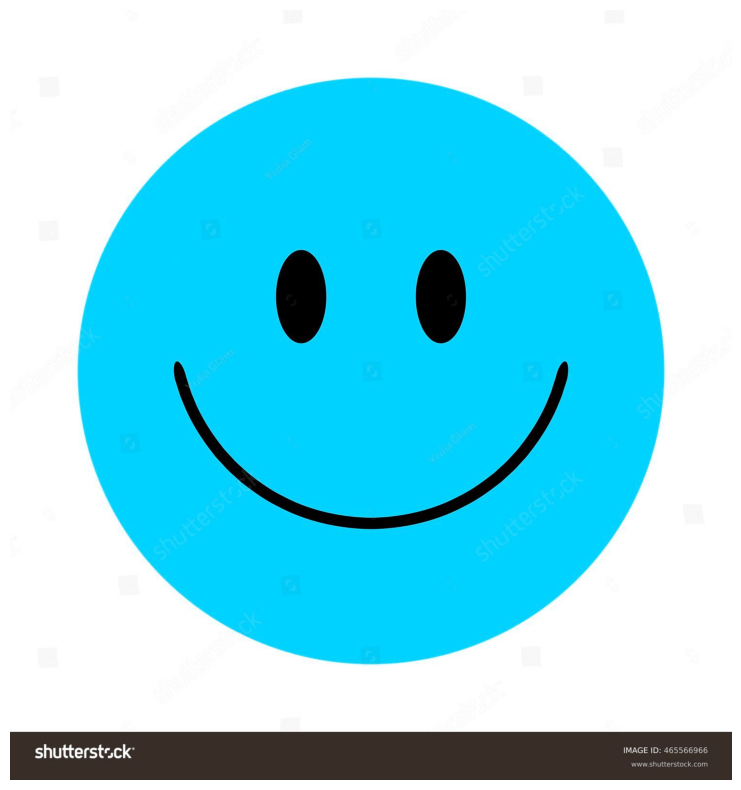

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')

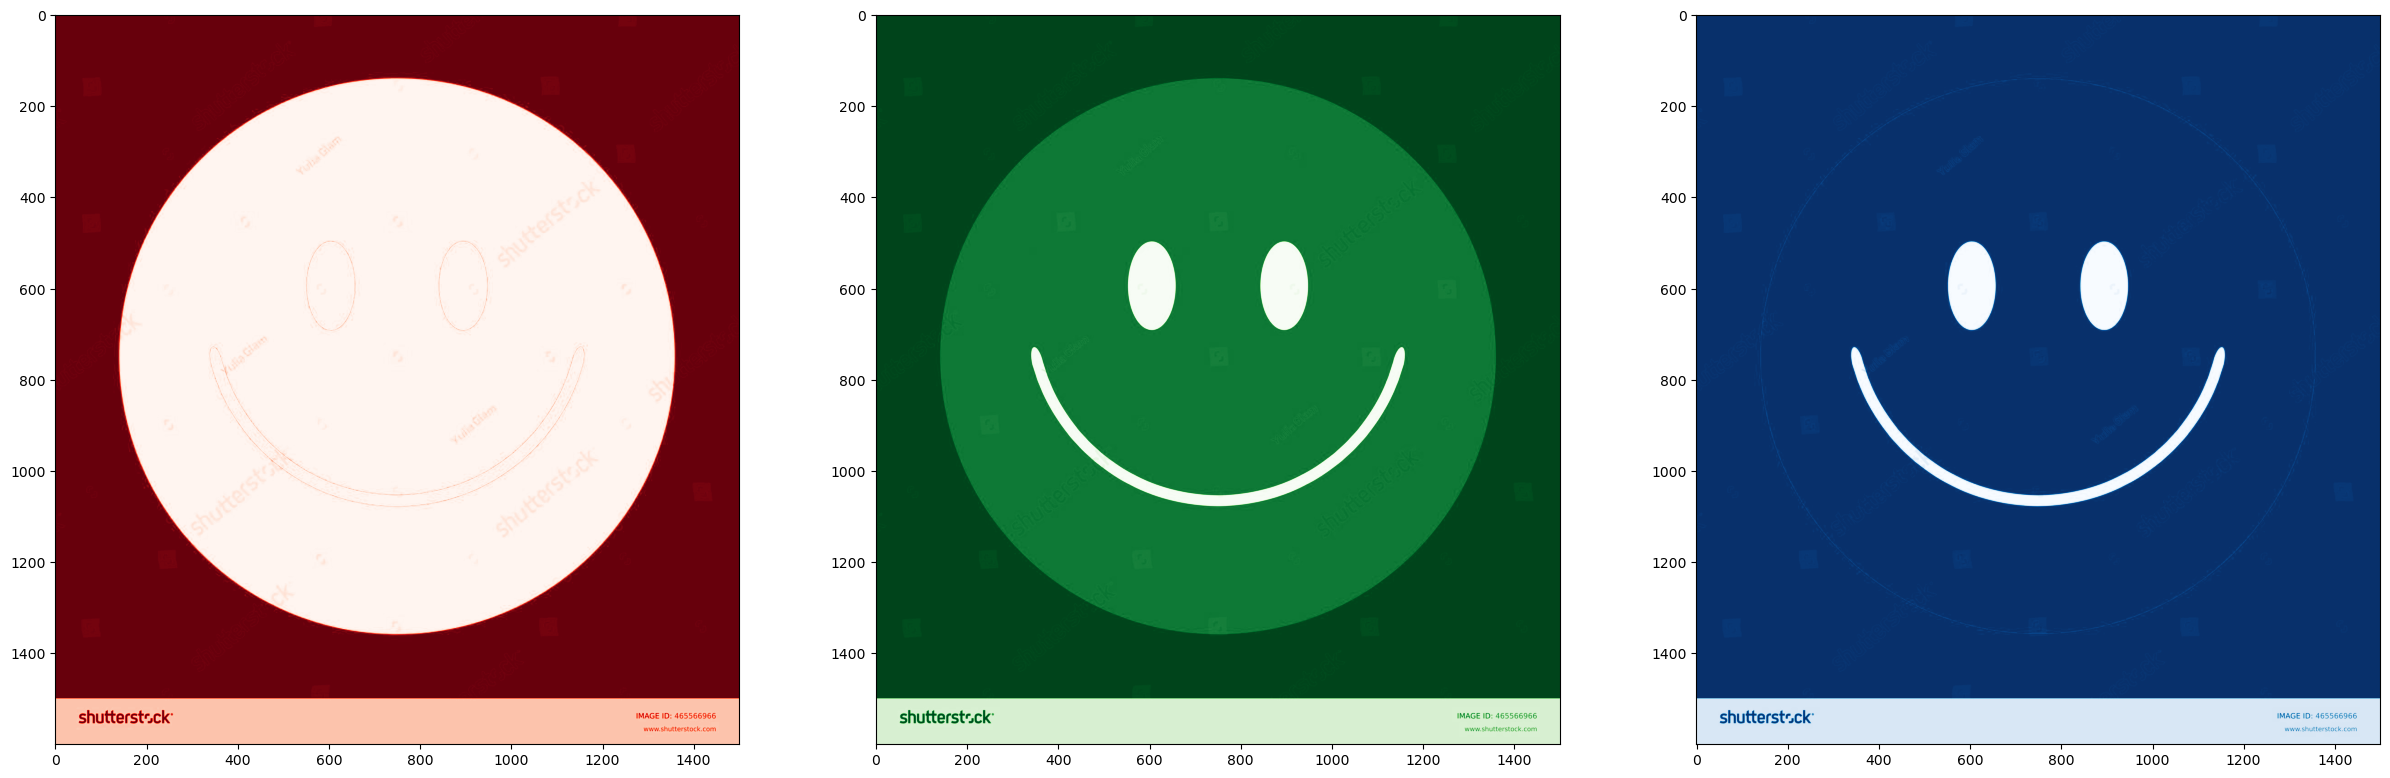

In [12]:
fig,ax=plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(image[:,:,0],cmap='Reds')
ax[1].imshow(image[:,:,1],cmap='Greens')
ax[2].imshow(image[:,:,2],cmap='Blues')


In [13]:
image.shape

(1600, 1500, 3)

In [14]:
cv2.imshow('Image',image)

In [21]:
sub_images=image_seg(image)

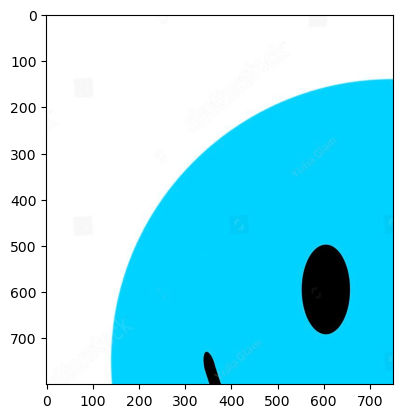

In [17]:
plt.imshow(image[0:800,0:750,])

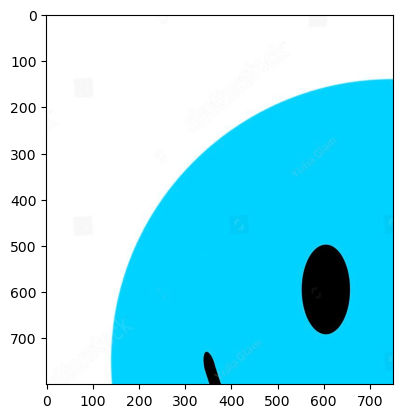

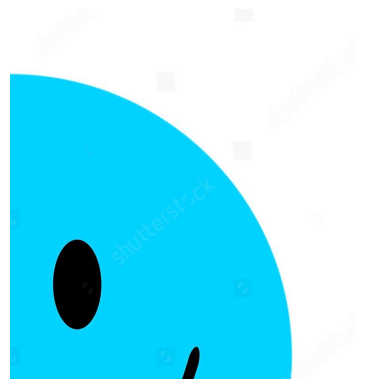

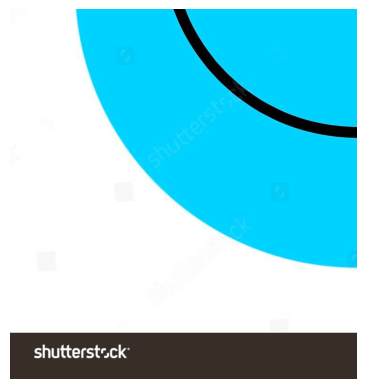

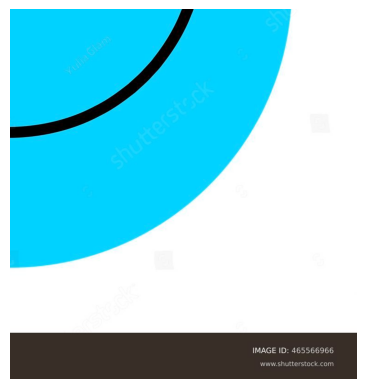

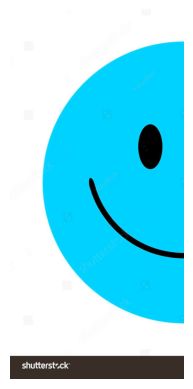

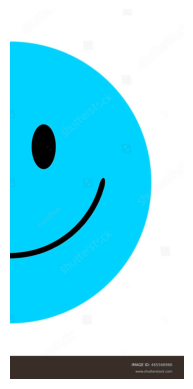

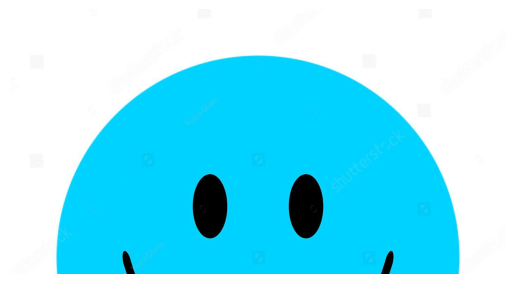

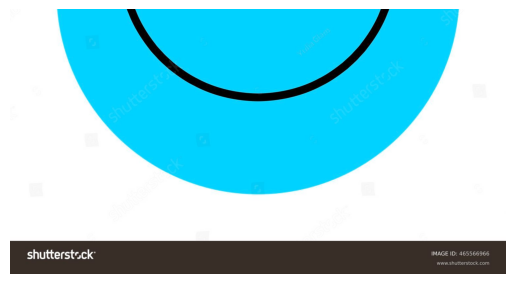

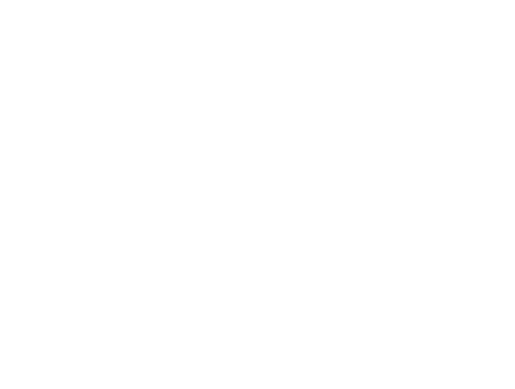

In [25]:
for num,img in enumerate(sub_images):
    plt.imshow(img)
    plt.show()
    plt.axis('off')